# Mushrooms Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


no missing value classification problems 

In [3]:
df.shape

(8124, 23)

we have 8124 rows and   23 columns

In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

string value is there

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

no nan value is there

In [6]:
df=pd.DataFrame(data=df)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
lencode=LabelEncoder()
df['class']=lencode.fit_transform(df['class'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


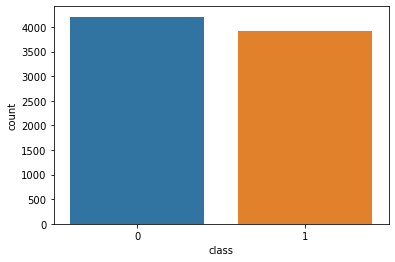

In [8]:
sn.countplot(df['class']);

count flot class showing almost stablized

<AxesSubplot:xlabel='class', ylabel='Density'>

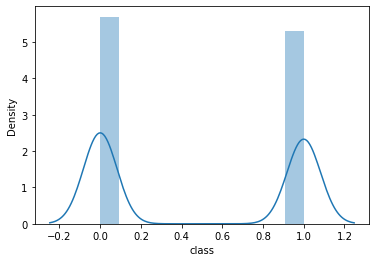

In [9]:
sn.distplot(df['class'])

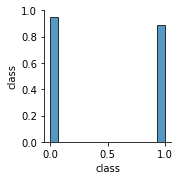

In [10]:
sn.pairplot(df)

In [11]:
lencode=LabelEncoder()
df['gill-attachment']=lencode.fit_transform(df['gill-attachment'])
df['gill-spacing']=lencode.fit_transform(df['gill-spacing'])
df['gill-size']=lencode.fit_transform(df['gill-size'])
df['gill-color']=lencode.fit_transform(df['gill-color'])
df['cap-shape']=lencode.fit_transform(df['cap-shape'])
df['cap-surface']=lencode.fit_transform(df['cap-surface'])
df['cap-color']=lencode.fit_transform(df['cap-color'])
df['bruises']=lencode.fit_transform(df['bruises'])
df['odor']=lencode.fit_transform(df['odor'])
df['stalk-shape']=lencode.fit_transform(df['stalk-shape'])
df['stalk-root']=lencode.fit_transform(df['stalk-root'])
df['stalk-surface-above-ring']=lencode.fit_transform(df['stalk-surface-above-ring'])
df['stalk-surface-below-ring']=lencode.fit_transform(df['stalk-surface-below-ring'])
df['stalk-color-above-ring']=lencode.fit_transform(df['stalk-color-above-ring'])
df['stalk-color-below-ring']=lencode.fit_transform(df['stalk-color-below-ring'])
df['veil-type']=lencode.fit_transform(df['veil-type'])
df['veil-color']=lencode.fit_transform(df['veil-color'])
df['ring-number']=lencode.fit_transform(df['ring-number'])
df['ring-type']=lencode.fit_transform(df['ring-type'])
df['spore-print-color']=lencode.fit_transform(df['spore-print-color'])
df['population']=lencode.fit_transform(df['population'])
df['habitat']=lencode.fit_transform(df['habitat'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [12]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

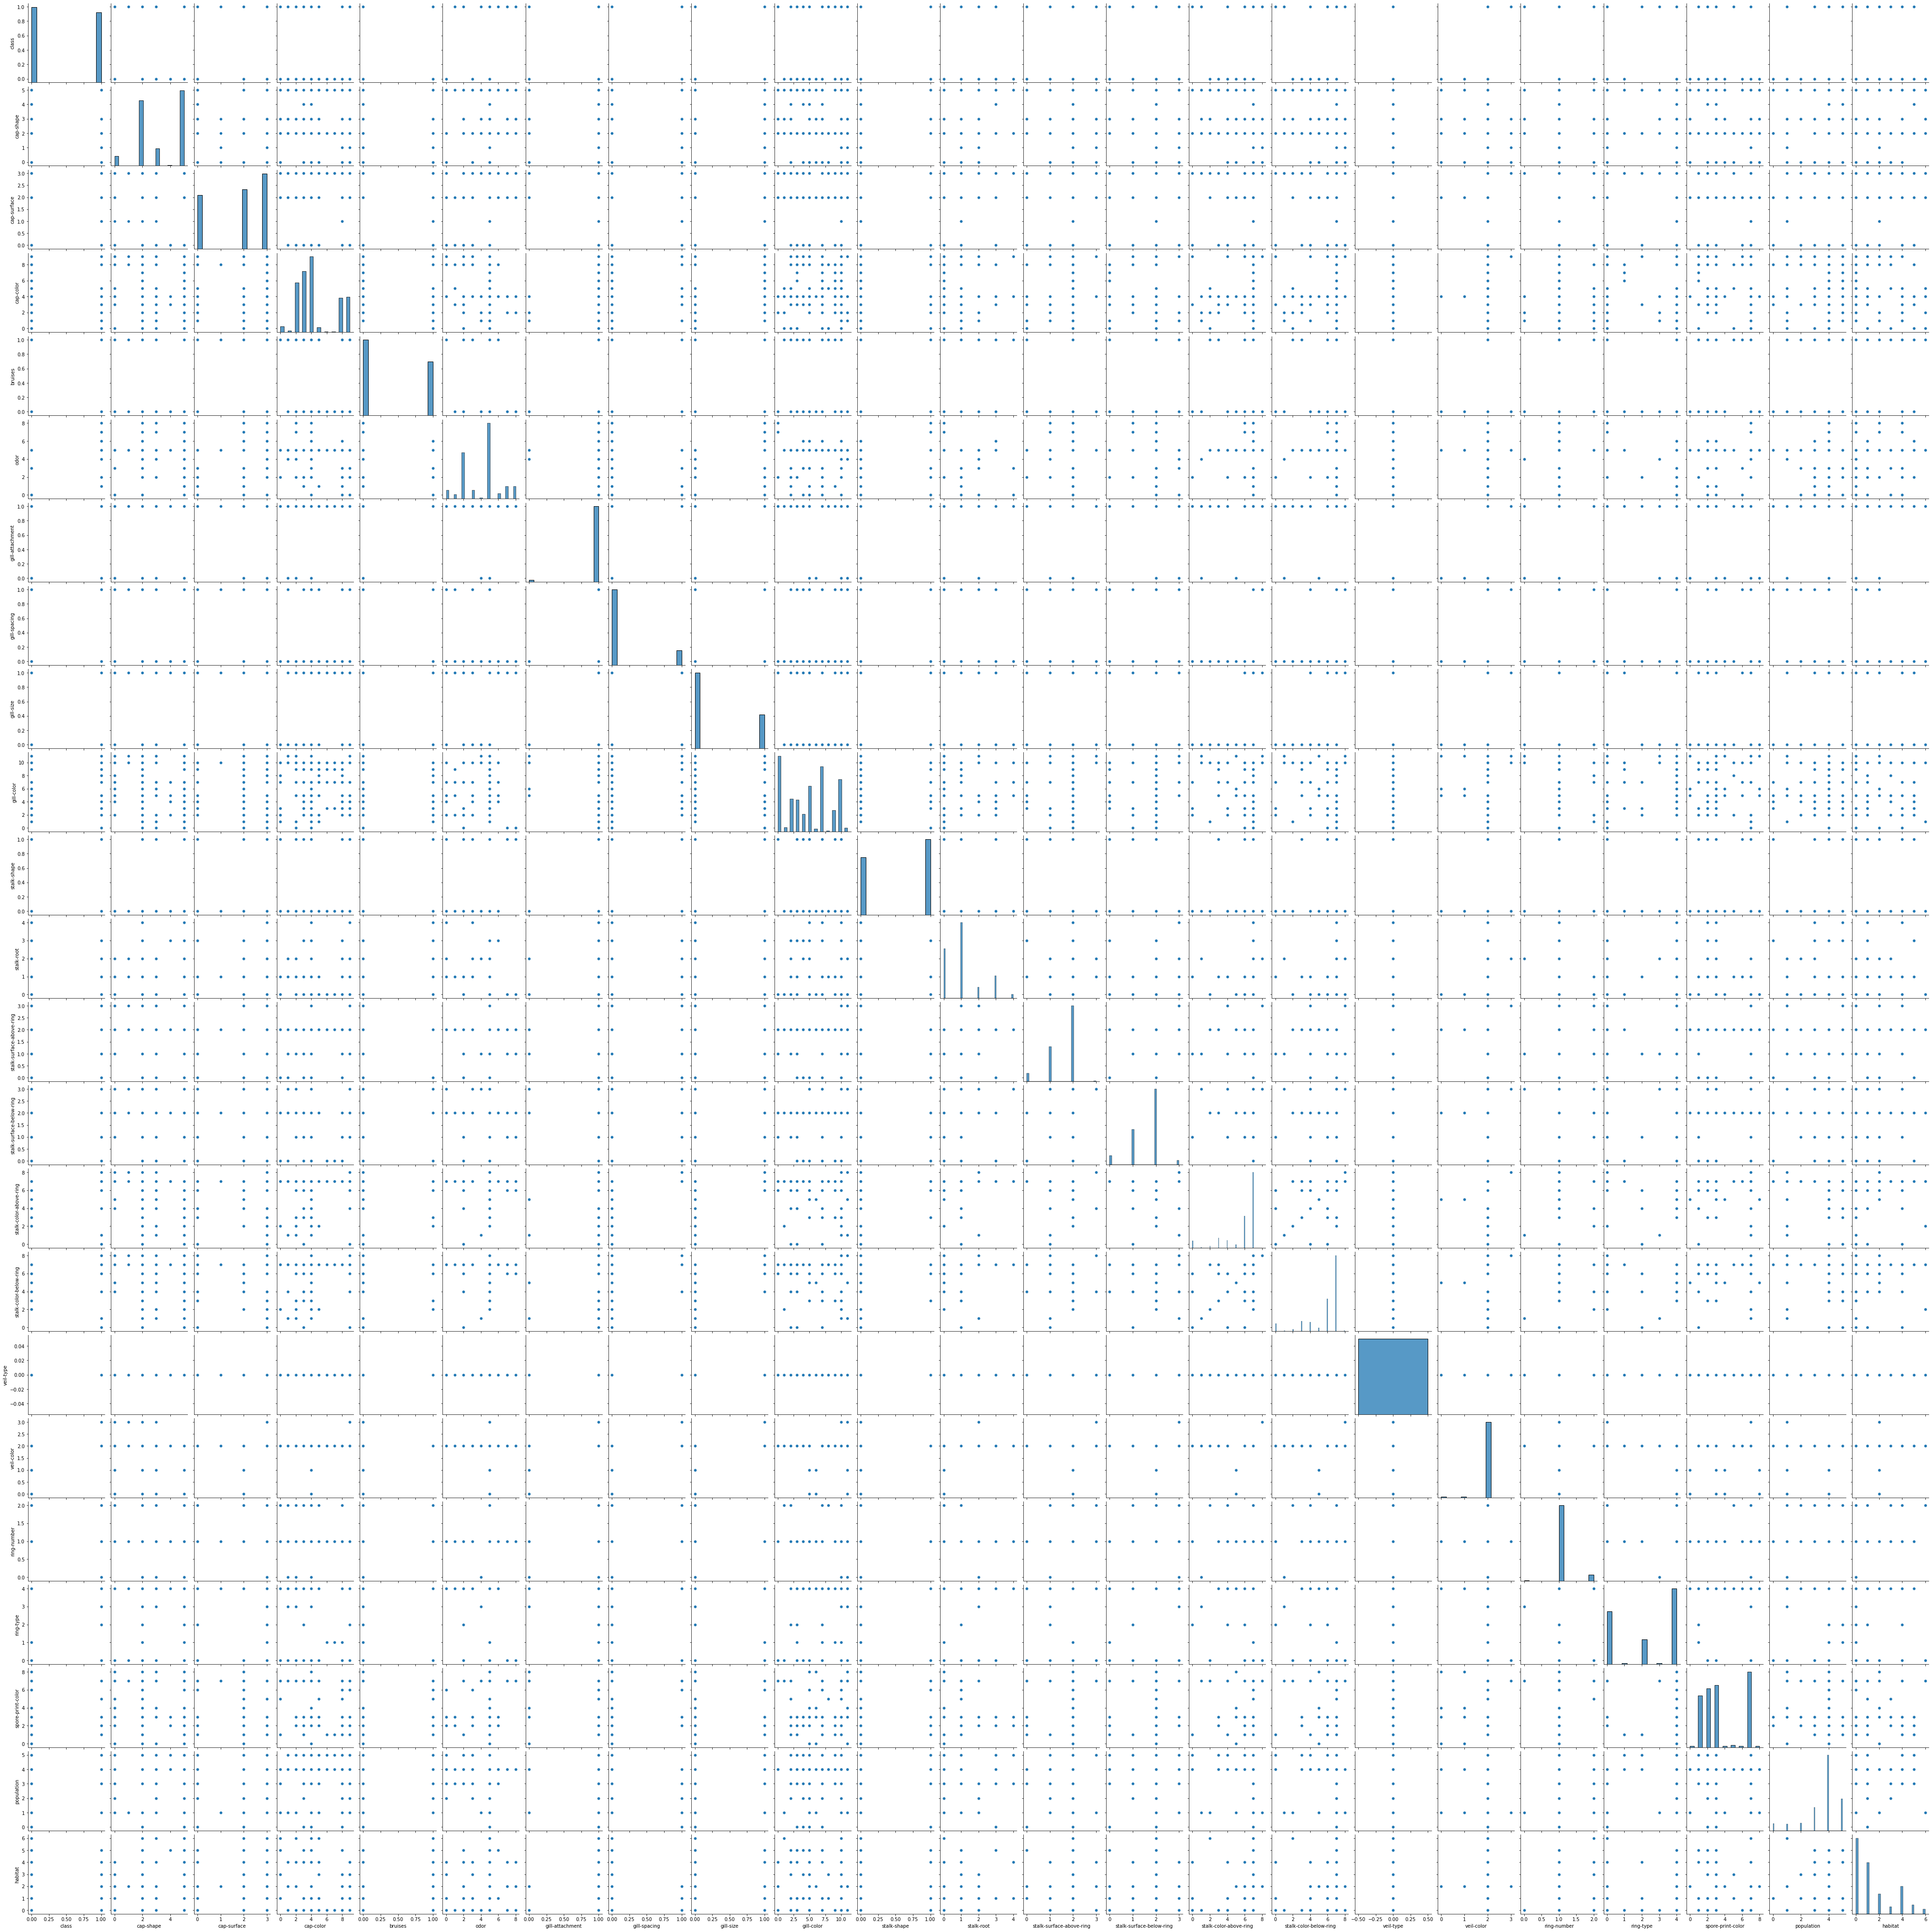

In [13]:
sns.pairplot(df)

In [14]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [15]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

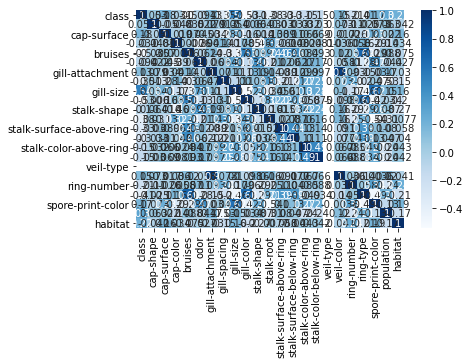

In [16]:
sn.heatmap(df.corr(),cmap='Blues',annot=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
x=df.iloc[:,0:-1]
x

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,0,2,1,4,2,3
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,0,2,1,4,3,2
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,0,2,1,4,3,2
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,0,2,1,4,2,3
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,0,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,1,4,0,1
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,0,1,4,0,4
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,0,1,1,4,0,1
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,0,2,1,0,7,4


In [19]:
x.shape

(8124, 22)

In [20]:
y=df.iloc[:,-1]
y

0       5
1       1
2       3
3       5
4       1
       ..
8119    2
8120    2
8121    2
8122    2
8123    2
Name: habitat, Length: 8124, dtype: int32

In [21]:
y.shape

(8124,)

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [23]:
xtrain.shape

(5686, 22)

In [24]:
ytrain.shape

(5686,)

In [71]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ad_pred=ad.predict(xtest)
print(accuracy_score(ytest,ad_pred))
print(confusion_matrix(ytest,ad_pred))
print(classification_report(ytest,ad_pred))
from sklearn.svm import SVC
svc=SVC(kernel='linear')
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc,algorithm='SAMME')
ad.fit(xtrain,ytrain)
adpred=ad.predict(xtest)
print(accuracy_score(ytest,ad_pred))
print(confusion_matrix(ytest,ad_pred))
print(classification_report(ytest,ad_pred))

0.27317473338802295
[[173  38 189   0   1 513   0]
 [231 225 146   0  15  49   0]
 [  0  23 199   0  18   0   0]
 [  0  86   0   0   0   7   0]
 [135  12 186   0  28   0   0]
 [ 30  36   0   0   0  41   0]
 [  0   0  57   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.30      0.19      0.23       914
           1       0.54      0.34      0.41       666
           2       0.26      0.83      0.39       240
           3       0.00      0.00      0.00        93
           4       0.45      0.08      0.13       361
           5       0.07      0.38      0.11       107
           6       0.00      0.00      0.00        57

    accuracy                           0.27      2438
   macro avg       0.23      0.26      0.18      2438
weighted avg       0.36      0.27      0.26      2438

0.27317473338802295
[[173  38 189   0   1 513   0]
 [231 225 146   0  15  49   0]
 [  0  23 199   0  18   0   0]
 [  0  86   0   0   0   7   0]
 [135  12 186   0  28

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
gb_pred=gb.predict(xtest)
print(accuracy_score(ytest,gb_pred))
print(confusion_matrix(ytest,gb_pred))
print(classification_report(ytest,gb_pred))

0.6004922067268252
[[675  70  87   0  82   0   0]
 [ 38 432   0  67  64  65   0]
 [ 65   0 135   0  40   0   0]
 [  0  59   0  34   0   0   0]
 [103  85 102   0  71   0   0]
 [  0  47   0   0   0  60   0]
 [  0   0   0   0   0   0  57]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       914
           1       0.62      0.65      0.64       666
           2       0.42      0.56      0.48       240
           3       0.34      0.37      0.35        93
           4       0.28      0.20      0.23       361
           5       0.48      0.56      0.52       107
           6       1.00      1.00      1.00        57

    accuracy                           0.60      2438
   macro avg       0.56      0.58      0.57      2438
weighted avg       0.60      0.60      0.60      2438



Zscore program

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [28]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 17,  6, 17], dtype=int64))


<AxesSubplot:ylabel='Frequency'>

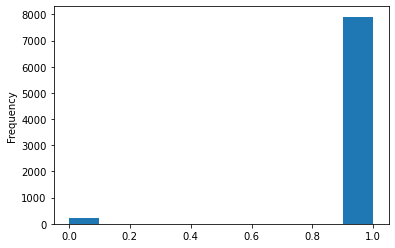

In [30]:
df['gill-attachment'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

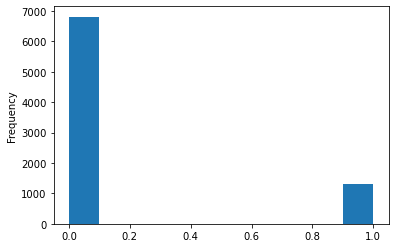

In [31]:
df['gill-spacing'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

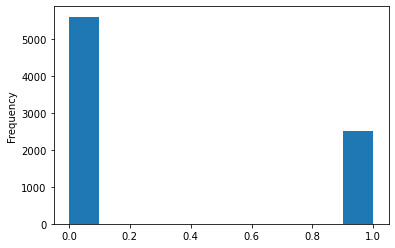

In [33]:
df['gill-size'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

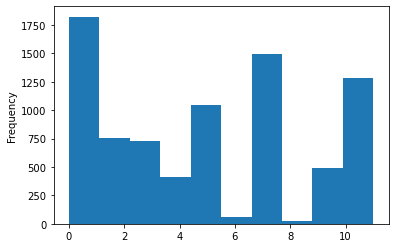

In [34]:
df['gill-color'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

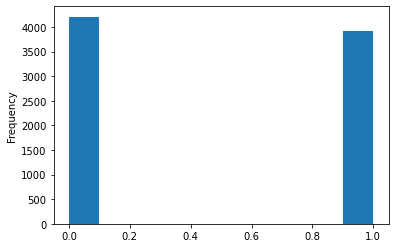

In [35]:
df['class'].plot.hist()

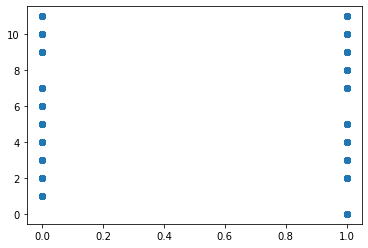

In [38]:
plt.scatter(df['class'],df['gill-color'])
plt.show()

In [39]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 1.0366127 ,  1.02971224,  0.14012794, ...,  0.94808086,
        -0.67019486, -0.5143892 ],
       [-0.96468045,  1.02971224,  0.14012794, ...,  0.94808086,
        -0.2504706 , -1.31310821],
       [-0.96468045, -2.08704716,  0.14012794, ...,  0.94808086,
        -0.2504706 , -1.31310821],
       ...,
       [-0.96468045, -0.8403434 ,  0.14012794, ...,  0.94808086,
        -1.50964337, -2.11182722],
       [ 1.0366127 , -0.21699152,  0.95327039, ..., -1.27221574,
         1.42842641,  0.28432981],
       [-0.96468045,  1.02971224,  0.14012794, ...,  0.94808086,
         0.16925365, -2.11182722]])

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [41]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([ 2.52054097e-01,  6.30058387e-03, -3.31857373e-02, -6.17977020e-02,
        5.13252654e-01, -1.55596498e-01, -3.19577471e-01, -6.26325476e-01,
        4.23204499e-01, -9.39369812e-02, -2.91178393e-01,  6.30503656e-01,
       -1.40939438e-01, -1.38776841e-01,  3.66049587e-02,  1.92715293e-03,
       -5.55111512e-17, -7.39000268e-02,  7.80072451e-01, -6.78626220e-01,
        4.10515203e-03, -2.09860355e-01])

In [43]:
lr.intercept_

1.5035547256154687

In [44]:
lr.score(xtrain,ytrain)

0.39265470897699495

In [45]:
pred=lr.predict(xtest)
pred

array([2.17113731, 3.44865704, 1.03390358, ..., 1.42276563, 0.2666584 ,
       0.1876664 ])

In [46]:
print('Predicted values',pred)

Predicted values [2.17113731 3.44865704 1.03390358 ... 1.42276563 0.2666584  0.1876664 ]


In [47]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,2.171137
1,3.448657
2,1.033904
3,1.636134
4,1.605137
...,...
2433,1.628394
2434,5.331592
2435,1.422766
2436,0.266658


In [48]:
lr.score(xtest,ytest)

0.37250384307258

In [49]:
print('Mean absolute error::',mean_absolute_error(ytest,pred)) 
print('Mean squared error::',mean_squared_error(ytest,pred))
print('Root mean square::',np.sqrt(mean_squared_error(ytest,pred)))

Mean absolute error:: 1.0245059684501432
Mean squared error:: 1.8557854015339381
Root mean square:: 1.3622721466483627


calculating r2 score

In [51]:
print('R2 score::',r2_score(ytest,pred))

R2 score:: 0.37250384307258


liner regression model

In [54]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
lm.score(xtrain,ytrain)
pred=lm.predict(xtest)
print('Predicted result:',pred)
print('actual',ytest)

Predicted result: [2.17113731 3.44865704 1.03390358 ... 1.42276563 0.2666584  0.1876664 ]
actual 355     5
1088    1
5763    5
3425    4
5993    1
       ..
4957    0
5223    6
5009    0
1871    0
2397    0
Name: habitat, Length: 2438, dtype: int32


In [55]:
print('actual result:',ytest)

actual result: 355     5
1088    1
5763    5
3425    4
5993    1
       ..
4957    0
5223    6
5009    0
1871    0
2397    0
Name: habitat, Length: 2438, dtype: int32


calculating error

In [56]:
print('error:')
print(mean_squared_error(pred,ytest))

error:
1.8557854015339381


In [57]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)

0.39265452100192655

In [58]:
ls.coef_

array([ 0.25187273,  0.00617068, -0.03286114, -0.06157792,  0.51229161,
       -0.15530078, -0.31907283, -0.62619998,  0.42292325, -0.0938143 ,
       -0.29096339,  0.62996376, -0.14072232, -0.13846069,  0.03658161,
        0.00189033,  0.        , -0.07385472,  0.77975821, -0.67810183,
        0.00378703, -0.21001738])

In [59]:
rd=Ridge(alpha=0.0001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)

0.3926547089769934

In [60]:
rd.coef_

array([ 0.2520541 ,  0.00630058, -0.03318572, -0.0617977 ,  0.51325261,
       -0.15559647, -0.31957739, -0.62632544,  0.42320443, -0.09393699,
       -0.29117843,  0.63050359, -0.14093943, -0.13877683,  0.03660497,
        0.00192716,  0.        , -0.07390006,  0.78007236, -0.67862616,
        0.00410519, -0.20986037])

In [61]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(xtrain,ytrain)
enrpred=enr.predict(xtest)
print(enr.score(xtrain,ytrain))
enr.coef_

0.3926546160544274


array([ 0.25196886,  0.00623443, -0.03298749, -0.0616949 ,  0.51264718,
       -0.15537522, -0.31909061, -0.62615382,  0.42286843, -0.09389191,
       -0.29116534,  0.63006007, -0.14079609, -0.13859371,  0.03661712,
        0.00193867,  0.        , -0.0739713 ,  0.77966743, -0.67819007,
        0.00405379, -0.20997791])

accuracy score of all model

In [63]:
from sklearn.svm import SVR

In [65]:
svr = SVR(kernel = 'linear')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)

In [66]:
svr = SVR(kernel = 'poly')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)

In [67]:
svr = SVR(kernel = 'rbf')
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_y=svr.predict(xtest)

In [68]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(xtrain,ytrain)
    print(sv.score(xtrain,ytrain))

0.31542277940773156
0.4689597665740354
0.4545554833916423


In [69]:
gb.fit(xtrain,ytrain)
gb_pred=gb.predict(xtest)
print(accuracy_score(ytest,gb_pred))
print(confusion_matrix(ytest,gb_pred))
print(classification_report(ytest,gb_pred))

0.6004922067268252
[[675  70  87   0  82   0   0]
 [ 38 432   0  67  64  65   0]
 [ 65   0 135   0  40   0   0]
 [  0  59   0  34   0   0   0]
 [103  85 102   0  71   0   0]
 [  0  47   0   0   0  60   0]
 [  0   0   0   0   0   0  57]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       914
           1       0.62      0.65      0.64       666
           2       0.42      0.56      0.48       240
           3       0.34      0.37      0.35        93
           4       0.28      0.20      0.23       361
           5       0.48      0.56      0.52       107
           6       1.00      1.00      1.00        57

    accuracy                           0.60      2438
   macro avg       0.56      0.58      0.57      2438
weighted avg       0.60      0.60      0.60      2438



In [70]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc,algorithm='SAMME')
ad.fit(xtrain,ytrain)
ad_pred=ad.predict(xtest)
print(accuracy_score(ytest,ad_pred))
print(confusion_matrix(ytest,ad_pred))
print(classification_report(ytest,ad_pred))

0.6292042657916325
[[740  23  98   0  49   4   0]
 [ 99 492   0  28  15  32   0]
 [ 77   0 131   0  32   0   0]
 [  0  65   0  28   0   0   0]
 [169  42  93   7  50   0   0]
 [  3  50   0   0   6  48   0]
 [  0   0   0  12   0   0  45]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       914
           1       0.73      0.74      0.74       666
           2       0.41      0.55      0.47       240
           3       0.37      0.30      0.33        93
           4       0.33      0.14      0.19       361
           5       0.57      0.45      0.50       107
           6       1.00      0.79      0.88        57

    accuracy                           0.63      2438
   macro avg       0.58      0.54      0.55      2438
weighted avg       0.61      0.63      0.61      2438



In [74]:
ad = AdaBoostClassifier(n_estimators=50)
ad.fit(xtrain,ytrain)
ad_pred=ad.predict(xtest)
print(accuracy_score(ytest,ad_pred))
print(confusion_matrix(ytest,ad_pred))
print(classification_report(ytest,ad_pred))

0.27317473338802295
[[173  38 189   0   1 513   0]
 [231 225 146   0  15  49   0]
 [  0  23 199   0  18   0   0]
 [  0  86   0   0   0   7   0]
 [135  12 186   0  28   0   0]
 [ 30  36   0   0   0  41   0]
 [  0   0  57   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.30      0.19      0.23       914
           1       0.54      0.34      0.41       666
           2       0.26      0.83      0.39       240
           3       0.00      0.00      0.00        93
           4       0.45      0.08      0.13       361
           5       0.07      0.38      0.11       107
           6       0.00      0.00      0.00        57

    accuracy                           0.27      2438
   macro avg       0.23      0.26      0.18      2438
weighted avg       0.36      0.27      0.26      2438



In [73]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ad_pred=ad.predict(xtest)
print(accuracy_score(ytest,ad_pred))
print(confusion_matrix(ytest,ad_pred))
print(classification_report(ytest,ad_pred))

0.27317473338802295
[[173  38 189   0   1 513   0]
 [231 225 146   0  15  49   0]
 [  0  23 199   0  18   0   0]
 [  0  86   0   0   0   7   0]
 [135  12 186   0  28   0   0]
 [ 30  36   0   0   0  41   0]
 [  0   0  57   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.30      0.19      0.23       914
           1       0.54      0.34      0.41       666
           2       0.26      0.83      0.39       240
           3       0.00      0.00      0.00        93
           4       0.45      0.08      0.13       361
           5       0.07      0.38      0.11       107
           6       0.00      0.00      0.00        57

    accuracy                           0.27      2438
   macro avg       0.23      0.26      0.18      2438
weighted avg       0.36      0.27      0.26      2438



accuracy score after boosting for every model